In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import Data_clening_functions as clean

pd.set_option("display.max_columns", None)
data_set = pd.read_csv(
    r"/home/ahmed/Ai/Data science and Ml projects/House-Prices-Prediction---Data-Science-Ml-project/original Data sets/train.csv"
)
test_df = pd.read_csv(
    r"/home/ahmed/Ai/Data science and Ml projects/House-Prices-Prediction---Data-Science-Ml-project/original Data sets/test.csv"
)
df = data_set.merge(test_df, how="outer")

/tmp/ipykernel_216768/284601798.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
/tmp/ipykernel_216768/284601798.py:14: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  df = data_set.merge(test_df, how="outer")


In [2]:
feature = df[
    [
        "LotFrontage",
        "LotArea",
        "Street",
        "OverallQual",
        "YearBuilt",
        "YearRemodAdd",
        "GarageYrBlt",
        "BsmtQual",
        "TotalBsmtSF",
        "CentralAir",
        "Heating",
        "GrLivArea",
        "WoodDeckSF",
        "SalePrice",
    ]
]
test = df["SalePrice"]


feature.isna().sum() * 100 / len(feature)

LotFrontage     16.649538
LotArea          0.000000
Street           0.000000
OverallQual      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
GarageYrBlt      5.447071
BsmtQual         2.774923
TotalBsmtSF      0.034258
CentralAir       0.000000
Heating          0.000000
GrLivArea        0.000000
WoodDeckSF       0.000000
SalePrice        0.000000
dtype: float64

<a id="intro"></a>

<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            1. renaming:
            </span>   
        </font>    
</h2>


In [3]:
feature = clean.rename_columns(feature)

feature.columns

/home/ahmed/Ai/Data science and Ml projects/House-Prices-Prediction---Data-Science-Ml-project/Data_Cleaning_and_Preprocessing/Data_clening_functions.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns=mapper, inplace=True)


Index(['front_house_area', 'house_area', 'street', 'quality', 'year_built',
       'year_remodel_add', 'garage_year_build', 'basement_quality',
       'basement_area', 'central_air_conditioning', 'heating',
       'grade_living_area', 'wood_deck_area', 'SalePrice'],
      dtype='object')

<a id="intro"></a>

<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            2. fill missing values:
            </span>   
        </font>    
</h2>


In [4]:
feature = clean.missing_values(feature)
feature.isna().sum()

/home/ahmed/Ai/Data science and Ml projects/House-Prices-Prediction---Data-Science-Ml-project/Data_Cleaning_and_Preprocessing/Data_clening_functions.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[["front_house_area"]] = KNN.transform(df[["front_house_area"]])
/home/ahmed/Ai/Data science and Ml projects/House-Prices-Prediction---Data-Science-Ml-project/Data_Cleaning_and_Preprocessing/Data_clening_functions.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[["basement_quality"]] = simple_imputer

front_house_area            0
house_area                  0
street                      0
quality                     0
year_built                  0
year_remodel_add            0
garage_year_build           0
basement_quality            0
basement_area               0
central_air_conditioning    0
heating                     0
grade_living_area           0
wood_deck_area              0
SalePrice                   0
dtype: int64

<a id="intro"></a>

<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            3. Outliers:
            </span>   
        </font>    
</h2>


<h3 name='libraries'>   
      <font color = purple >
            <span style='font-family:Georgia'>
            1.1 SalePrice :
            </span>   
        </font>    
</h3>


442567.0099999991
79000.0


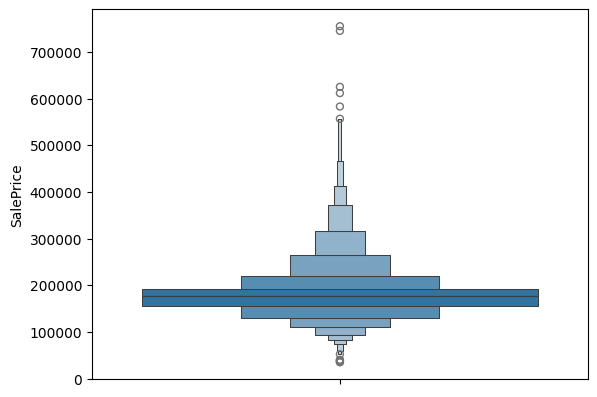

In [5]:
sns.boxenplot(feature["SalePrice"])

print(feature["SalePrice"].quantile(0.995))
print(feature["SalePrice"].quantile(0.01))

In [6]:
Q1 = feature["SalePrice"].quantile(0.01)
Q2 = feature["SalePrice"].quantile(0.995)

df = clean.remove_outliers_quantile(Q1, Q2, "SalePrice", feature)

44


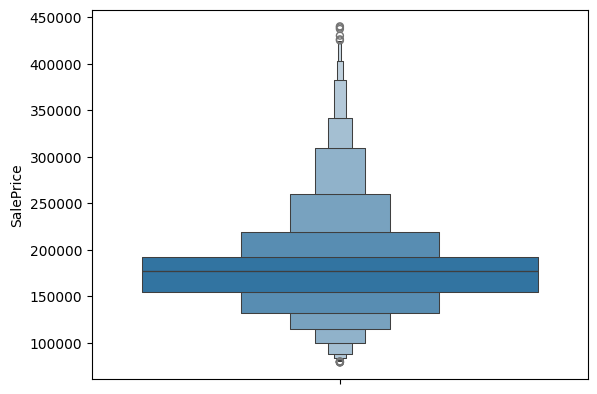

In [7]:
sns.boxenplot(df["SalePrice"])
feature = df

<h3 name='libraries'>   
      <font color = purple >
            <span style='font-family:Georgia'>
            1.2 front house area :
            </span>   
        </font>    
</h3>


149.0
21.0


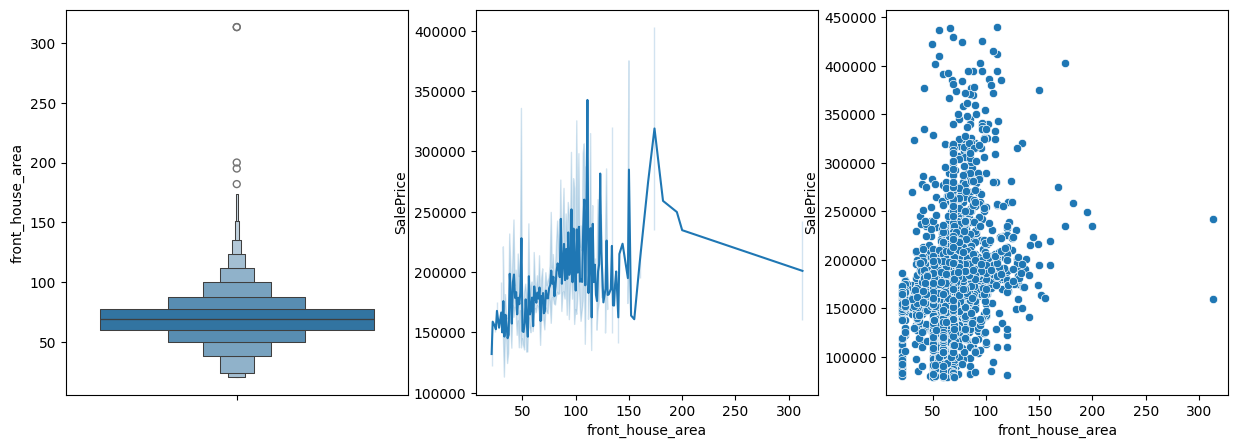

In [8]:
fig, axe = plt.subplots(1, 3, figsize=(15, 5))

sns.boxenplot(feature["front_house_area"], ax=axe[0])
sns.lineplot(x=feature["front_house_area"], y=feature["SalePrice"], ax=axe[1])
sns.scatterplot(x=feature["front_house_area"], y=feature["SalePrice"], ax=axe[2])

print(feature["front_house_area"].quantile(0.995))
print(feature["front_house_area"].quantile(0.01))

In [9]:
df = clean.remove_outliers_quantile(
    feature["front_house_area"].quantile(0.018),
    feature["front_house_area"].quantile(0.9935),
    "front_house_area",
    feature,
)
df

67


,front_house_area,house_area,street,quality,year_built,year_remodel_add,garage_year_build,basement_quality,basement_area,central_air_conditioning,heating,grade_living_area,wood_deck_area,SalePrice
0,65.000000,8450,Pave,7,2003,2003,2003.000000,Gd,856.0,Y,GasA,1710,0,208500.000000
1,80.000000,9600,Pave,6,1976,1976,1976.000000,Gd,1262.0,Y,GasA,1262,298,181500.000000
2,68.000000,11250,Pave,7,2001,2002,2001.000000,Gd,920.0,Y,GasA,1786,0,223500.000000
3,60.000000,9550,Pave,7,1915,1970,1998.000000,TA,756.0,Y,GasA,1717,0,140000.000000
4,84.000000,14260,Pave,8,2000,2000,2000.000000,Gd,1145.0,Y,GasA,2198,192,250000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2907,58.000000,10172,Pave,5,1968,2003,1968.000000,TA,864.0,Y,GasA,874,0,187709.555004
2908,69.305795,11836,Pave,5,1970,1970,1970.000000,TA,1652.0,Y,GasA,1652,0,196526.002999
2911,80.000000,13384,Pave,5,1969,1979,1969.000000,TA,1104.0,Y,GasA,1360,160,188506.431412
2917,62.000000,10441,Pave,5,1992,1992,1978.113406,Gd,912.0,Y,GasA,970,80,184924.279659


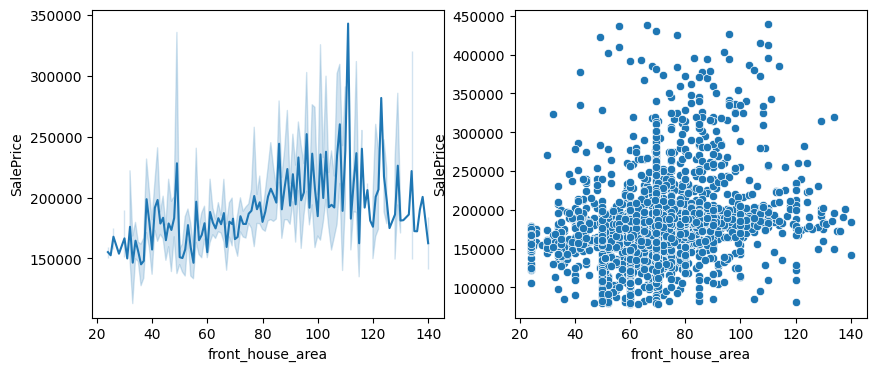

In [10]:
fig, axe = plt.subplots(1, 2, figsize=(10, 4))
sns.lineplot(
    x=df["front_house_area"],
    y=df["SalePrice"],
    ax=axe[0],
)
sns.scatterplot(
    x=df["front_house_area"],
    y=df["SalePrice"],
    ax=axe[1],
)
plt.show()

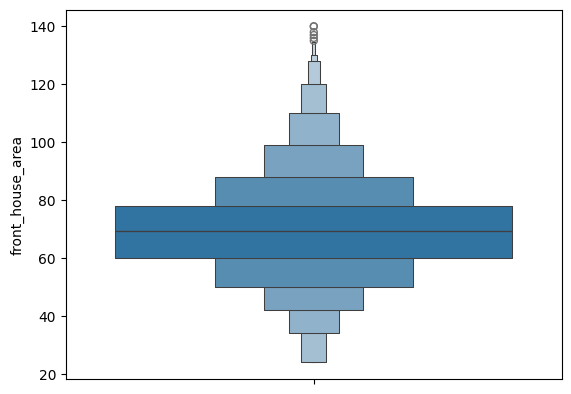

In [11]:
sns.boxenplot(df["front_house_area"])
feature = df

<h3 name='libraries'>   
      <font color = purple >
            <span style='font-family:Georgia'>
            1.3 year_built:
            </span>   
        </font>    
</h3>


2009.1930000000002
1902.28


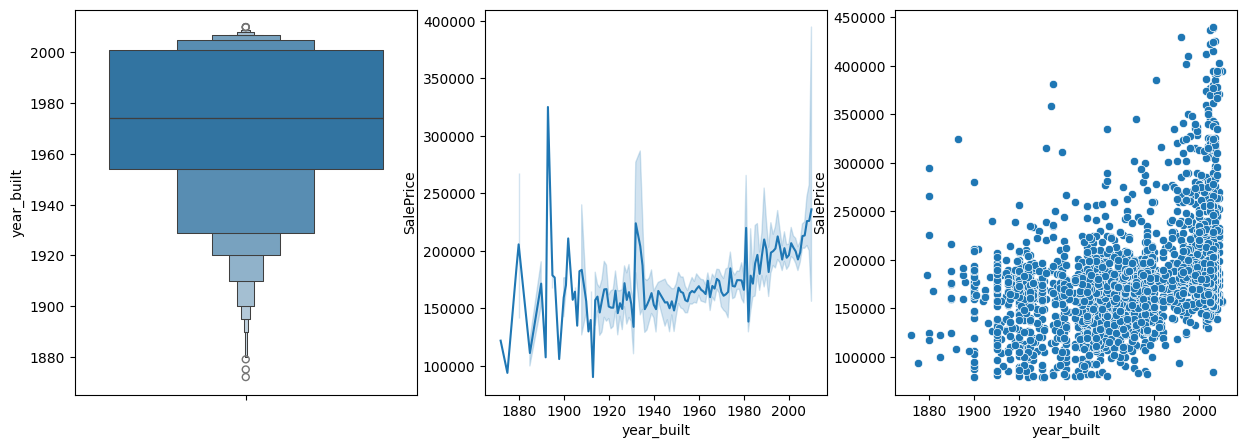

In [12]:
fig, axe = plt.subplots(1, 3, figsize=(15, 5))

sns.boxenplot(feature["year_built"], ax=axe[0])
sns.lineplot(x=feature["year_built"], y=feature["SalePrice"], ax=axe[1])
sns.scatterplot(x=feature["year_built"], y=feature["SalePrice"], ax=axe[2])

print(feature["year_built"].quantile(0.999))
print(feature["year_built"].quantile(0.02))

In [13]:
Q1 = feature["year_built"].quantile(0.02)
Q2 = feature["year_built"].quantile(0.999)

df = clean.remove_outliers_quantile(Q1, Q2, "year_built", feature)
feature = df

60


2009.0
1912.0


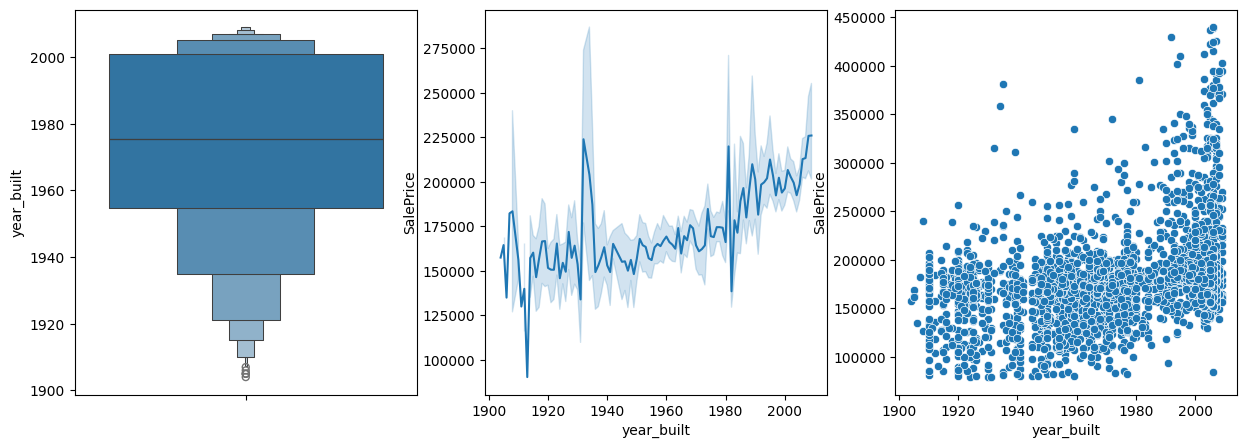

In [14]:
fig, axe = plt.subplots(1, 3, figsize=(15, 5))

sns.boxenplot(feature["year_built"], ax=axe[0])
sns.lineplot(x=feature["year_built"], y=feature["SalePrice"], ax=axe[1])
sns.scatterplot(x=feature["year_built"], y=feature["SalePrice"], ax=axe[2])

print(feature["year_built"].quantile(0.999))
print(feature["year_built"].quantile(0.02))

<h3 name='libraries'>   
      <font color = purple >
            <span style='font-family:Georgia'>
            1.4 year_remodel_add:
            </span>   
        </font>    
</h3>


2010.0
1950.0


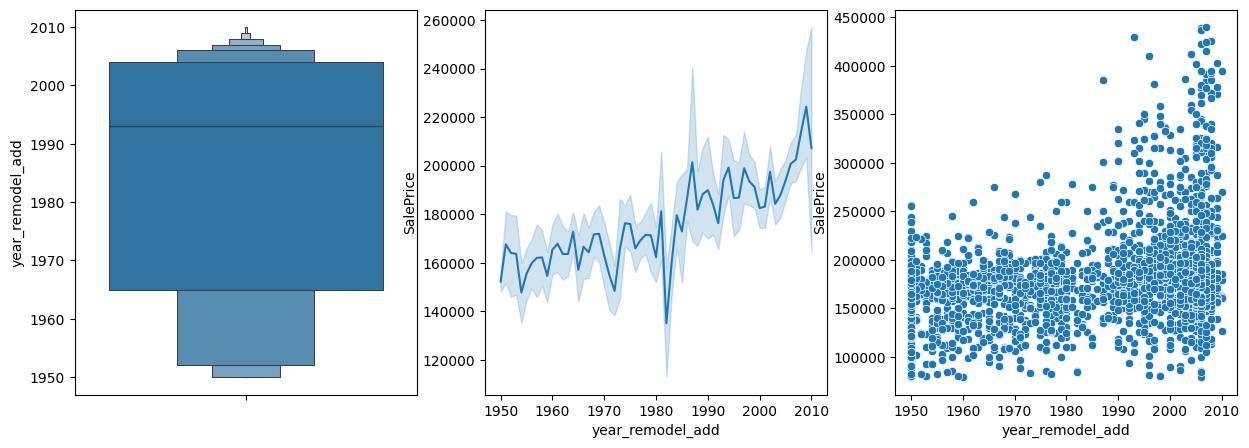

In [15]:
fig, axe = plt.subplots(1, 3, figsize=(15, 5))

sns.boxenplot(feature["year_remodel_add"], ax=axe[0])
sns.lineplot(x=feature["year_remodel_add"], y=feature["SalePrice"], ax=axe[1])
sns.scatterplot(x=feature["year_remodel_add"], y=feature["SalePrice"], ax=axe[2])

print(feature["year_remodel_add"].quantile(0.999))
print(feature["year_remodel_add"].quantile(0.02))

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: No Outliers</b><br>
    </span>    
</div>


<h3 name='libraries'>   
      <font color = purple >
            <span style='font-family:Georgia'>
            1.5 garage_year_build:
            </span>   
        </font>    
</h3>


2010.0
1900.0


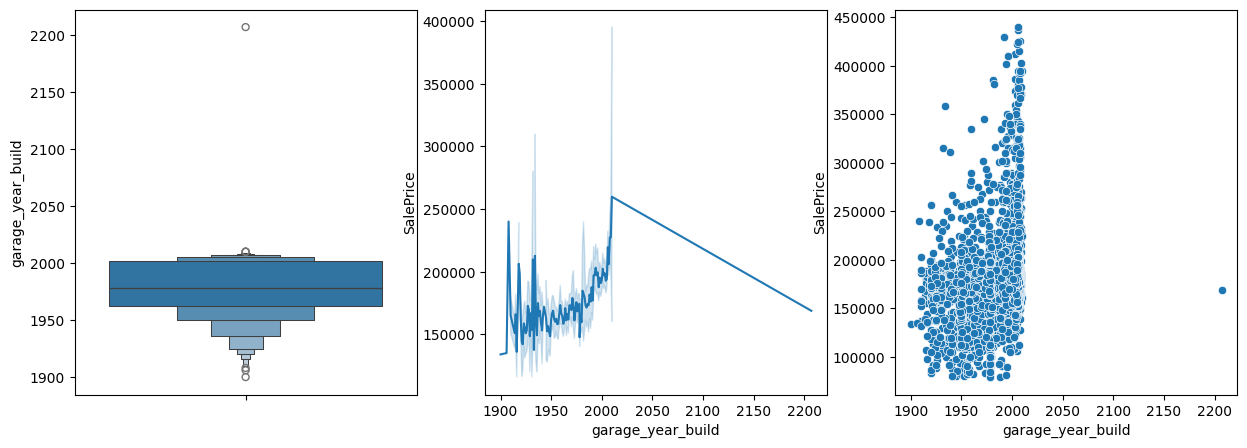

In [16]:
fig, axe = plt.subplots(1, 3, figsize=(15, 5))

sns.boxenplot(feature["garage_year_build"], ax=axe[0])
sns.lineplot(x=feature["garage_year_build"], y=feature["SalePrice"], ax=axe[1])
sns.scatterplot(x=feature["garage_year_build"], y=feature["SalePrice"], ax=axe[2])

print(feature["garage_year_build"].quantile(0.999))
print(feature["garage_year_build"].quantile(0.0))

The dot on the far right is alone because it feels sad


In [17]:
Q1 = feature["garage_year_build"].quantile(0.00)
Q2 = feature["garage_year_build"].quantile(0.999)

df = clean.remove_outliers_quantile(Q1, Q2, "garage_year_build", feature)
feature = df

1


<h3 name='libraries'>   
      <font color = purple >
            <span style='font-family:Georgia'>
            1.6 basement_area:
            </span>   
        </font>    
</h3>


2138.16
0.0


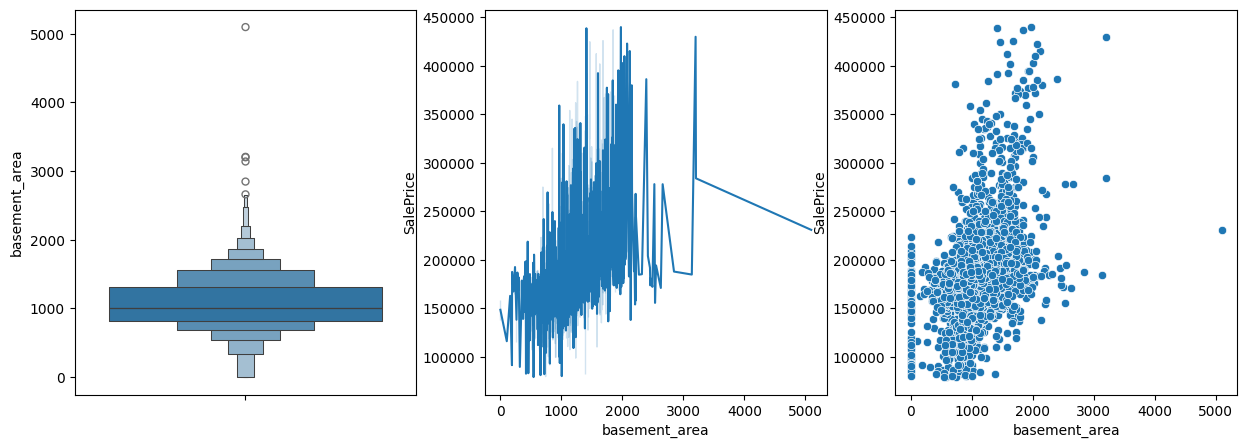

In [18]:
fig, axe = plt.subplots(1, 3, figsize=(15, 5))

sns.boxenplot(feature["basement_area"], ax=axe[0])
sns.lineplot(x=feature["basement_area"], y=feature["SalePrice"], ax=axe[1])
sns.scatterplot(x=feature["basement_area"], y=feature["SalePrice"], ax=axe[2])

print(feature["basement_area"].quantile(0.99))

print(feature["basement_area"].quantile(0.01))

In [19]:
Q1 = feature["basement_area"].quantile(0.026)
Q2 = feature["basement_area"].quantile(0.99)
df = clean.remove_outliers_quantile(Q1, Q2, "basement_area", feature)

100


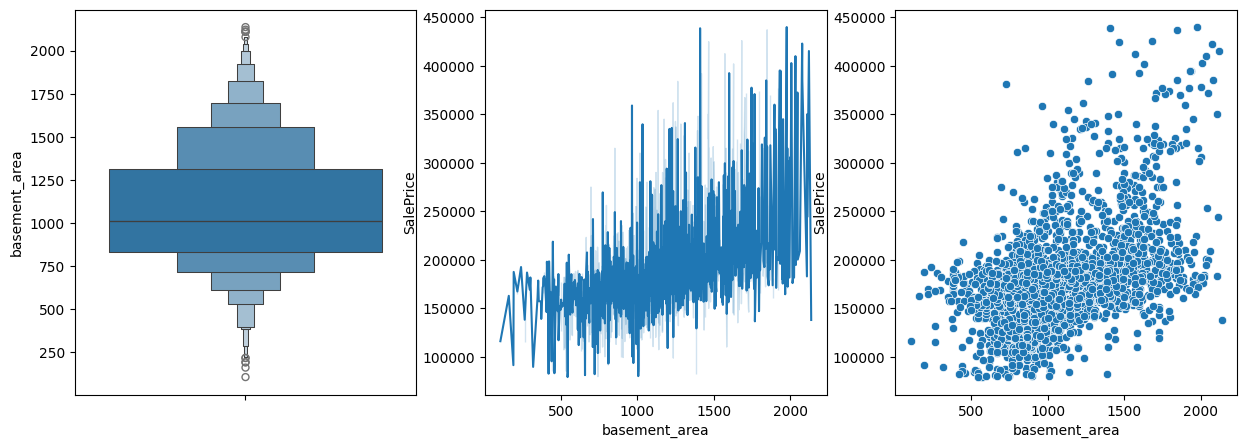

In [20]:
fig, axe = plt.subplots(1, 3, figsize=(15, 5))

sns.boxenplot(df["basement_area"], ax=axe[0])
sns.lineplot(x=df["basement_area"], y=df["SalePrice"], ax=axe[1])
sns.scatterplot(x=df["basement_area"], y=df["SalePrice"], ax=axe[2])

feature = df

<h3 name='libraries'>   
      <font color = purple >
            <span style='font-family:Georgia'>
            1.7 grade_living_area:
            </span>   
        </font>    
</h3>


2673.7999999999993
600.752


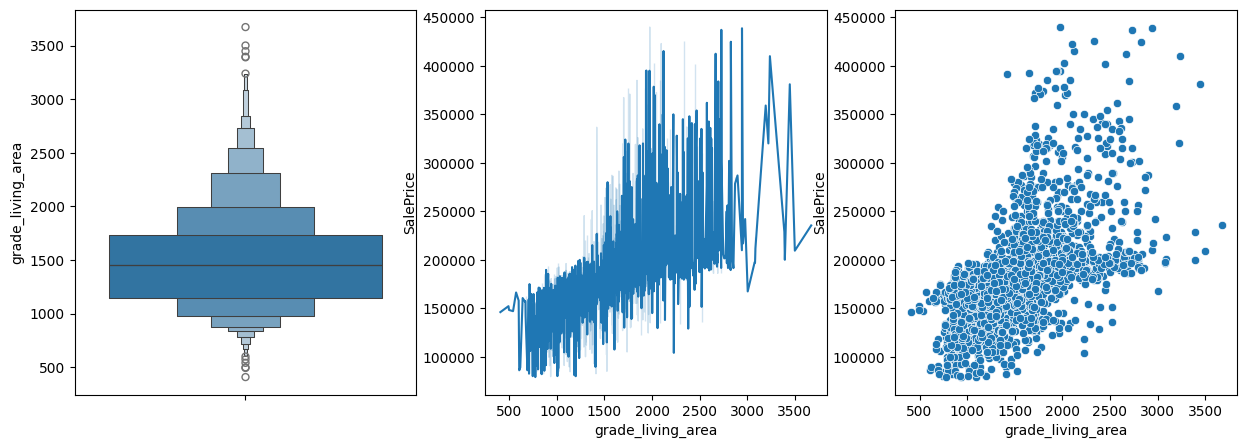

In [21]:
fig, axe = plt.subplots(1, 3, figsize=(15, 5))

sns.boxenplot(feature["grade_living_area"], ax=axe[0])
sns.lineplot(x=feature["grade_living_area"], y=feature["SalePrice"], ax=axe[1])
sns.scatterplot(x=feature["grade_living_area"], y=feature["SalePrice"], ax=axe[2])

print(feature["grade_living_area"].quantile(0.98))

print(feature["grade_living_area"].quantile(0.002))

In [22]:
Q1 = feature["grade_living_area"].quantile(0.002)
Q2 = feature["grade_living_area"].quantile(0.98)
df = clean.remove_outliers_quantile(Q1, Q2, "grade_living_area", feature)

59


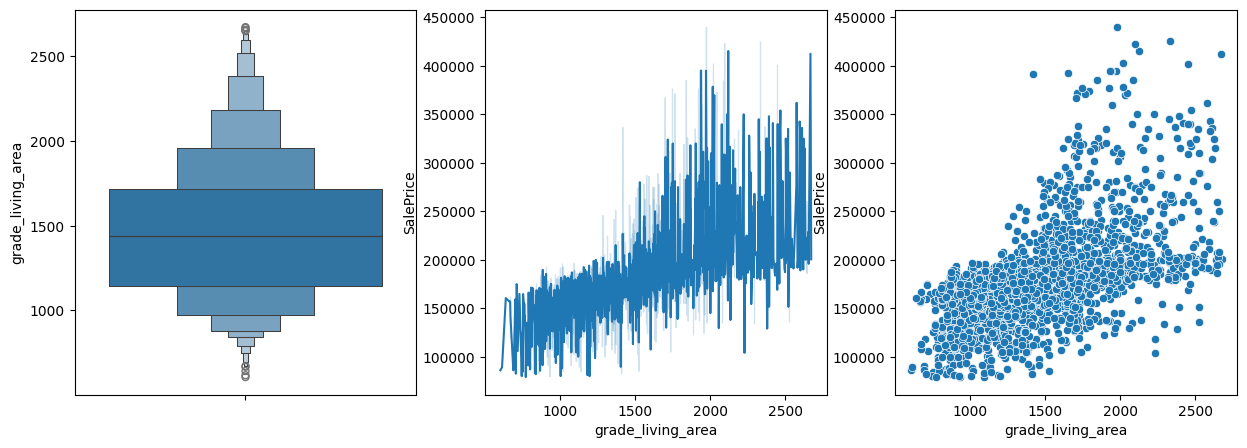

In [23]:
fig, axe = plt.subplots(1, 3, figsize=(15, 5))

sns.boxenplot(df["grade_living_area"], ax=axe[0])
sns.lineplot(x=df["grade_living_area"], y=df["SalePrice"], ax=axe[1])
sns.scatterplot(x=df["grade_living_area"], y=df["SalePrice"], ax=axe[2])
feature = df

<h3 name='libraries'>   
      <font color = purple >
            <span style='font-family:Georgia'>
            1.7 wood_deck_area:
            </span>   
        </font>    
</h3>


486.52000000000044
0.0


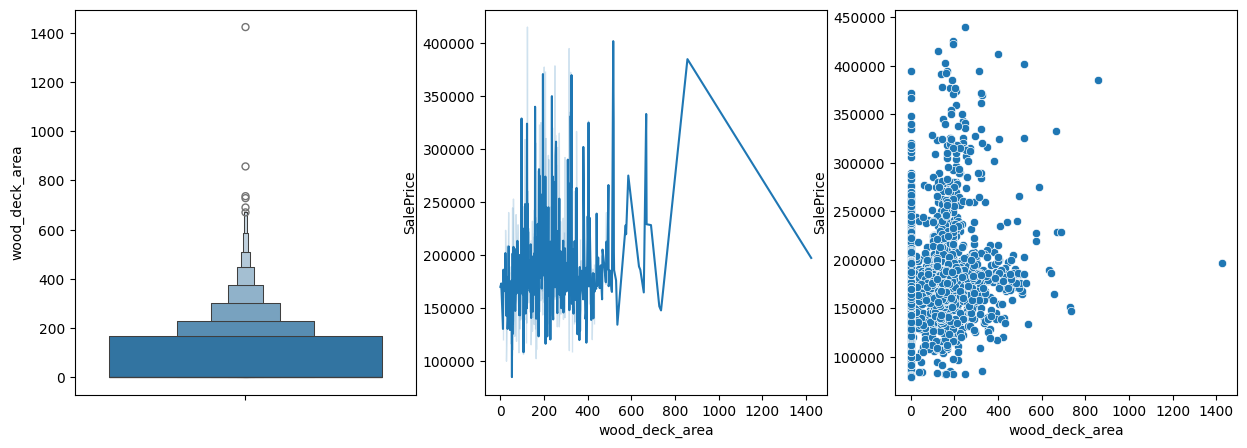

In [24]:
fig, axe = plt.subplots(1, 3, figsize=(15, 5))

sns.boxenplot(feature["wood_deck_area"], ax=axe[0])
sns.lineplot(x=feature["wood_deck_area"], y=feature["SalePrice"], ax=axe[1])
sns.scatterplot(x=feature["wood_deck_area"], y=feature["SalePrice"], ax=axe[2])

print(feature["wood_deck_area"].quantile(0.99))

print(feature["wood_deck_area"].quantile(0.513))

In [25]:
Q1 = feature["wood_deck_area"].quantile(0.513)
Q2 = feature["wood_deck_area"].quantile(0.99)
df = clean.remove_outliers_quantile(Q1, Q2, "wood_deck_area", feature)

26


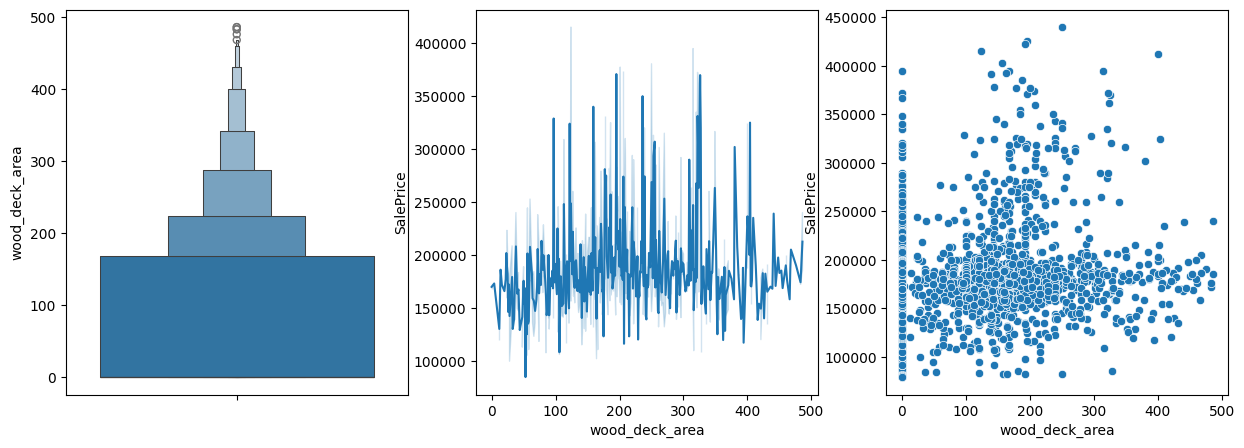

In [26]:
fig, axe = plt.subplots(1, 3, figsize=(15, 5))

sns.boxenplot(df["wood_deck_area"], ax=axe[0])
sns.lineplot(x=df["wood_deck_area"], y=df["SalePrice"], ax=axe[1])
sns.scatterplot(x=df["wood_deck_area"], y=df["SalePrice"], ax=axe[2])
feature = df

In [27]:
feature

,front_house_area,house_area,street,quality,year_built,year_remodel_add,garage_year_build,basement_quality,basement_area,central_air_conditioning,heating,grade_living_area,wood_deck_area,SalePrice
0,65.000000,8450,Pave,7,2003,2003,2003.000000,Gd,856.0,Y,GasA,1710,0,208500.000000
1,80.000000,9600,Pave,6,1976,1976,1976.000000,Gd,1262.0,Y,GasA,1262,298,181500.000000
2,68.000000,11250,Pave,7,2001,2002,2001.000000,Gd,920.0,Y,GasA,1786,0,223500.000000
3,60.000000,9550,Pave,7,1915,1970,1998.000000,TA,756.0,Y,GasA,1717,0,140000.000000
4,84.000000,14260,Pave,8,2000,2000,2000.000000,Gd,1145.0,Y,GasA,2198,192,250000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2907,58.000000,10172,Pave,5,1968,2003,1968.000000,TA,864.0,Y,GasA,874,0,187709.555004
2908,69.305795,11836,Pave,5,1970,1970,1970.000000,TA,1652.0,Y,GasA,1652,0,196526.002999
2911,80.000000,13384,Pave,5,1969,1979,1969.000000,TA,1104.0,Y,GasA,1360,160,188506.431412
2917,62.000000,10441,Pave,5,1992,1992,1978.113406,Gd,912.0,Y,GasA,970,80,184924.279659


In [28]:
test["SalePrice"] = feature["SalePrice"]
Final_dataset = feature.copy()
Final_dataset["SalePrice"] = test["SalePrice"]
Final_dataset

,front_house_area,house_area,street,quality,year_built,year_remodel_add,garage_year_build,basement_quality,basement_area,central_air_conditioning,heating,grade_living_area,wood_deck_area,SalePrice
0,65.000000,8450,Pave,7,2003,2003,2003.000000,Gd,856.0,Y,GasA,1710,0,208500.000000
1,80.000000,9600,Pave,6,1976,1976,1976.000000,Gd,1262.0,Y,GasA,1262,298,181500.000000
2,68.000000,11250,Pave,7,2001,2002,2001.000000,Gd,920.0,Y,GasA,1786,0,223500.000000
3,60.000000,9550,Pave,7,1915,1970,1998.000000,TA,756.0,Y,GasA,1717,0,140000.000000
4,84.000000,14260,Pave,8,2000,2000,2000.000000,Gd,1145.0,Y,GasA,2198,192,250000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2907,58.000000,10172,Pave,5,1968,2003,1968.000000,TA,864.0,Y,GasA,874,0,187709.555004
2908,69.305795,11836,Pave,5,1970,1970,1970.000000,TA,1652.0,Y,GasA,1652,0,196526.002999
2911,80.000000,13384,Pave,5,1969,1979,1969.000000,TA,1104.0,Y,GasA,1360,160,188506.431412
2917,62.000000,10441,Pave,5,1992,1992,1978.113406,Gd,912.0,Y,GasA,970,80,184924.279659


In [29]:
feature.drop(columns=["SalePrice"], inplace=True)
feature

,front_house_area,house_area,street,quality,year_built,year_remodel_add,garage_year_build,basement_quality,basement_area,central_air_conditioning,heating,grade_living_area,wood_deck_area
0,65.000000,8450,Pave,7,2003,2003,2003.000000,Gd,856.0,Y,GasA,1710,0
1,80.000000,9600,Pave,6,1976,1976,1976.000000,Gd,1262.0,Y,GasA,1262,298
2,68.000000,11250,Pave,7,2001,2002,2001.000000,Gd,920.0,Y,GasA,1786,0
3,60.000000,9550,Pave,7,1915,1970,1998.000000,TA,756.0,Y,GasA,1717,0
4,84.000000,14260,Pave,8,2000,2000,2000.000000,Gd,1145.0,Y,GasA,2198,192
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2907,58.000000,10172,Pave,5,1968,2003,1968.000000,TA,864.0,Y,GasA,874,0
2908,69.305795,11836,Pave,5,1970,1970,1970.000000,TA,1652.0,Y,GasA,1652,0
2911,80.000000,13384,Pave,5,1969,1979,1969.000000,TA,1104.0,Y,GasA,1360,160
2917,62.000000,10441,Pave,5,1992,1992,1978.113406,Gd,912.0,Y,GasA,970,80


In [30]:
test.to_csv(
    r"/home/ahmed/Ai/Data science and Ml projects/House-Prices-Prediction---Data-Science-Ml-project/final_cleaned_datasets/test.csv"
)
feature.to_csv(
    r"/home/ahmed/Ai/Data science and Ml projects/House-Prices-Prediction---Data-Science-Ml-project/final_cleaned_datasets/features.csv"
)
Final_dataset.to_csv(
    r"/home/ahmed/Ai/Data science and Ml projects/House-Prices-Prediction---Data-Science-Ml-project/final_cleaned_datasets/Final_dataset.csv"
)